### 최단 경로 알고리즘

- 대표적인 알고리즘

> 다익스트라는 도로 cost가 minus값이 있으면 작동하지 않습니다

> 그리디 알고리즘이라고 볼 수도 있음

@ 음의 가중치가 있는 경우에는 다른 알고리즘인 벨만-포드 알고리즘을 사용해야 합니다.

#### Dijkstra

- 가중치 그래프에서 시작점과 도착점이 주어졌을 때, 최단 경로를 return하는 알고리즘 입니다.
(shortest path)

1. 각각의 노드에 라벨을 입력해요 (시작노드 : 0, 나머지노드: ∞)

- 나머지 노드 ▶ 문제에서 나오는 최댓값에 +1 을 해도 됩니다.

2. 사용 안한 라벨 중 제일 작은 라벨 찾아요.(사용체크)


3. 해당 노드에 인접한 노드의 라벨을 업데이트해요
(최종적으로 기존 라벨 값보다 작을 때만)

##### 가중치 그래프 구현
> 딕셔너리

In [ ]:
graph = {
    1:[2,4],
    2:[3,5,6],
    3:[5,6],
    4:[4,3],
    5:{2,5}
}

In [3]:
graph = {
    1: [(2, 2), (4, 1)],
    2: [(3, 1), (5, 2), (6, 4)],
    3: [(6, 4)],
    4: [(3, 3), (7, 5)],
    5: [(8, 1)],
    6: [(5, 3)],
    7: [(6, 7), (8, 6)],
    8: [],
}

In [4]:
import heapq
import math
def dijkstra(graph, start, destination, n):
    dist = [math.inf] * (n+1)
    pq = [(0, start)]
    while pq:
        current_dist, current_v = heapq.heappop(pq)
        if current_v in dist:
            dist[current_v] = current_dist
            for next_v, cost in graph[current_v]:
                next_dist = dist[current_v] +cost
                heapq.heappush(pq, (next_dist, next_v))
    return dist[destination]

print(dijkstra(graph, 1, 8, len(graph)))

inf


### 또다른 예시
(형식이 상이함)

In [41]:
# 노드의 갯수 = m, 도로의 갯수 = m
n, m = map(int, input().split())
start = int(input())
graph = [[] for i in range(n+1)]
distance = [float('inf')] * (n+1)
# 각 도로의 정보
# a노드에서 b노드로 가는 비용 = c
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b,c))
def dijkstra(start):
    q = []
    # 출발 노드로 가기 위한 최단 경로 0으로 설정
    # 우선순위 큐가 될 q에 넣는다
    heapq.heappush(q, (0, start))
    # 시작점은 역시 0에서부터 출발
    distance[start] = 0
    while q:\
        # 가장 최단거리가 짧은 노드에 대한 정보 꺼냄
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))
dijkstra(start)
# 최단거리 출력
for i in range(1, n+1):
    if distance[i] == float('inf'):
        print('무한')
    else:
        print(distance[i])

ValueError: not enough values to unpack (expected 2, got 1)

### 이 경우 시간복잡도는 O(MlogN)

반목문은 노드의 갯수 n이상의 횟수로는 처리되지 않습니다

#### 문제 : 배달

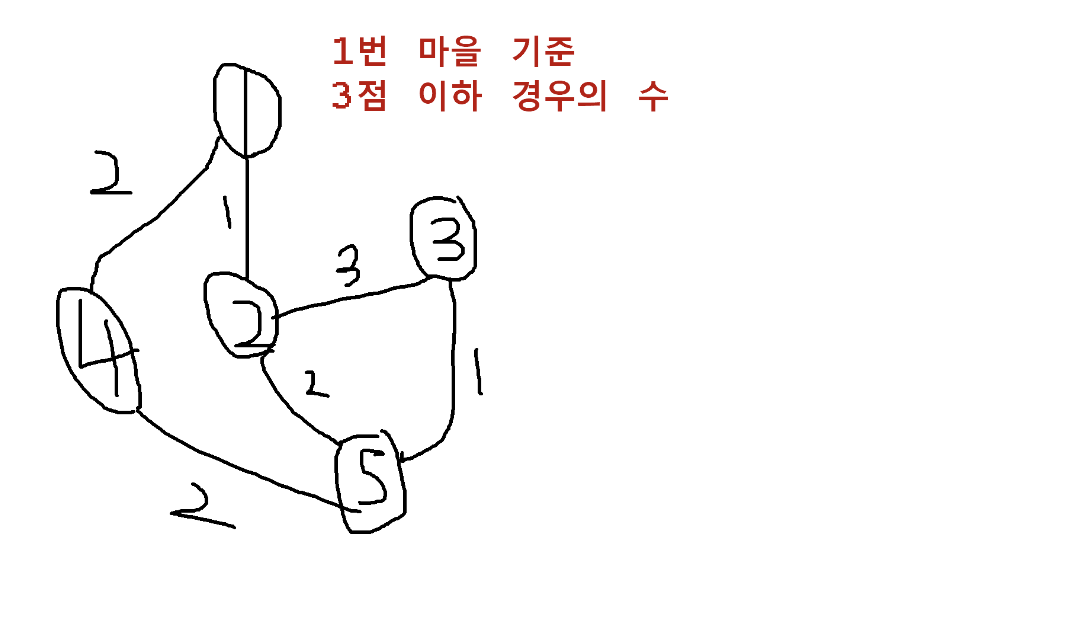

In [3]:
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3

https://school.programmers.co.kr/learn/courses/30/lessons/12978
시간복잡도 : ?????

In [ ]:
import heapq
import math
# 문제에서 제공
def solution(N, road, K):
    answer = 0
    current_node = road[0][0]
    # 깊이 우선 탐색?
    for i in road:
        heap = [0]
        next_node = heap[0]
        if i[0] == 1 or i[1] == 1:
            if i[2] <= K:
                heap.pop()
                heap.append(i)
        if i[0] == next_node or i[1] == next_node:
            if heap[2] + i[2] > K:
                continue
            else:
                heap.append(i)
    a = []
    for i in range(len(heap)):
        a.append(heap[0])
    answer = set(a)
    return sum(answer)

In [51]:
# 내 풀이
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3
answer = 0
current_node = road[0][0]
# 깊이 우선 탐색?
for i in road:
    heap = [0]
    next_node = heap[0]
    if i[0] == 1 or i[1] == 1:
        if i[2] <= K:
            heap.pop()
            heap.append(i)
    if i[0] == next_node or i[1] == next_node:
        if heap[2] + i[2] > K:
            continue
        else:
            heap.append(i)
a = []
for i in range(len(heap)):
    a.append(heap[0])
a = set(a)
print(sum(a))

0


In [1]:
# 해결방식
import heapq
def solution(N, road, K):
    dist = [float('inf')]*(N+1)
    dist[1] = 0
    adj = [[] for i in range(N+1)]
    for r in road:
        adj[r[0]].append([r[2], r[1]])
        adj[r[1]].append([r[2], r[0]])
    def dijkstra(dist, adj):
        heap = []
        heapq.heappush(heap, [0, 1])
        while heap:
            cost, node = heapq.heappop(heap)
            for c, n in adj[node]:
                if cost + c < dist[n]:
                    dist[n] = cost + c
                    heapq.heappush(heap, [cost+c, n])
                    print(dist)
    dijkstra(dist, adj)
    answer = len([i for i in dist if i <= K])
    return answer

In [4]:
solution(N, road, K)

[inf, 0, 1, inf, inf, inf]
[inf, 0, 1, inf, 2, inf]
[inf, 0, 1, 4, 2, inf]
[inf, 0, 1, 4, 2, 3]


4

In [53]:
import math, heapq
def solution(N, road, K):
    answer = []
    # 거리 초기화
    dist =[math.inf] * (N+1)
    # 힙 초기화
    adj = [[] for i in range(N+1)]
    # road를 가중치 그래프로 교체 [마을, 가중치]
    for i in road:
        adj[i[0]].append([i[2], i[1]])
        adj[i[1]].append([i[2], i[0]])
    dist[1] = 0
    def dijkstra(dist, adj):
        heap = []
        heapq.heappush(heap, [0, 1])
        while heap:
            cost, node = heapq.heappop(heap)
            for next_cost, next_node in adj[node]:
                if cost + next_cost < dist[next_node]:
                    dist[next_node] = cost + next_cost
                    heapq.heappush(heap, [cost+next_cost, next_node])
    dijkstra(dist, adj)
    for i in dist:
        if i <= K:
            answer.append(i)
    answer = len(answer)
    return answer
solution(N, road, K)

4

In [28]:
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
adj = [[] for i in range(N+1)]
for i in road:
    adj[i[0]].append([i[1], i[2]])
    adj[i[1]].append([i[0], i[2]])
adj

[[],
 [[1, 2], [2, 4]],
 [[1, 1], [3, 3], [2, 5]],
 [[3, 2], [1, 5]],
 [[2, 1], [2, 5]],
 [[2, 2], [1, 3], [2, 4]]]

In [29]:
dist = [float('inf')]*(N+1)
dist[1] = 0
dist

[inf, 0, inf, inf, inf, inf]

In [56]:
import heapq
def solution(N, road, K):
    dist = [math.inf]* (N+1)
    adj = [[] for i in range(N+1)] 
    dist[1] = 0
    for r in road:
        adj[r[0]].append([r[2], r[1]])
        adj[r[1]].append([r[2], r[0]])
    def dijkstra(dist, adj):
        heap = []
        heapq.heappush(heap, [0,1])
        while heap:
            cost, node = heapq.heappop(heap)
            for next_cost, next_node in adj[node]:
                if cost + next_cost < dist[next_node]:
                    dist[next_node] = cost+next_cost
                    heapq.heappush(heap, [cost+next_cost, next_node])            
    dijkstra(dist, adj)
    answer = []
    for i in dist:
        if i <= K:
            answer.append(i)
    return len(answer)

solution(N, road, K)

4